#  3 Cricket Project - predicting the market value of international cricketers in the India Premier League - pre-processing and training data development

## 3.1 Contents

## 3.2 Introduction
We're going to concentrate on the combined 2021 and 2022 cricketers' pricing and performance data that we worked on in the previous notebook

## 3.3 Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 3.4 Load the data

In [3]:
IPLPriceNPerf21_22 = pd.read_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\after_EDA\IPLPriceNPerf21_22_afterEDA_data.csv')
BowlersAR = pd.read_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\after_EDA\BowlersAR_21_22_afterEDA_data.csv')
Bat_AllR_WK = pd.read_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\after_EDA\Bat_AllR_WK_21_22_afterEDA_data.csv')
IPLPriceNPerf21_22.head()


,Unnamed: 0,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,673110.0,26.0,4.0,531.0,72.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880.0,18.0,2.0,519.0,64.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992.0,4.0,1.0,43.0,30.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


In [4]:
#Drop the unnamed column
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.drop(['Unnamed: 0'], axis=1)
IPLPriceNPerf21_22.head()

,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,0.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,673110.0,26.0,4.0,531.0,72.0,78.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,12.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880.0,18.0,2.0,519.0,64.0,95.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992.0,4.0,1.0,43.0,30.0,6.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


In [14]:
#Check bowlers data
BowlersAR.head()

,Unnamed: 0,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
2,3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880.0,18.0,2.0,519.0,64.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
3,4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992.0,4.0,1.0,43.0,30.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0
4,6,Mitchell Santner,New Zealand,Chennai Super Kings,All-Rounder,189468.0,0.0,2.0,22.0,0.0,...,4.0,32.500000,6.842105,28.500000,0.0,0.0,43.0,2.0,1.5,0.0


In [15]:
#Drop the unnamed column
BowlersAR = BowlersAR.drop(['Unnamed: 0'], axis=1)
BowlersAR.head()

,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,0.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,12.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
2,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880.0,18.0,2.0,519.0,64.0,95.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
3,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992.0,4.0,1.0,43.0,30.0,6.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0
4,Mitchell Santner,New Zealand,Chennai Super Kings,All-Rounder,189468.0,0.0,2.0,22.0,0.0,11.0,...,4.0,32.500000,6.842105,28.500000,0.0,0.0,43.0,2.0,1.5,0.0


## 3.5 Checking the data
There were some distortions caused in the data previously by the fact that some bowlers and all rounders did not have any bowling stats. There might be a similar situation with batsmen re batting, but less likely, given that most players (irrespective of primary role) will have to bat at some time. The converse is not true.

In [5]:
#Check all column headings
IPLPriceNPerf21_22.columns

Index(['Player', 'Country', 'Team', 'Type', 'Auc_Base_price_pounds',
       'Bat_Inns_21_22', 'NOs_21_22', 'Run_21_22', 'HS_21', 'HS_22',
       'Bat_Avg_21_22', 'BF_21_22', 'BatSR_21_22', '100s_21_22', '50s_21_22',
       '4s_21_22', '6s_21_22', 'Bowl_Inns_21_22', 'Ov_21_22',
       'BowlRunsConc_21_22', 'Wkts_21_22', 'Bowl_Avg_21_22', 'Econ_21_22',
       'BowlSR_21_22', '4w_21_22', '5w_21_22', 'Dots_21_22', 'Catches_21_22',
       'Run outs', 'Stumpings_21_22'],
      dtype='object')

In [7]:
#Look at unique values with innings bowled
pd.unique(IPLPriceNPerf21_22['Bowl_Inns_21_22'])

array([15.,  0., 21.,  8.,  6.,  4.,  2.,  9., 13., 30., 17., 22., 14.,
        5.,  3., 12., 29., 24.,  1., 28., 27., 32., 10.,  7., 16., 25.,
       11., 20.])

In [19]:
#How many have bowled at all - seems more than you would think
BowlersAR['Bowl_Inns_21_22'].value_counts()[0]

21

In [8]:
#Have a look at the unique values in overs bowled, which should link with innings bowled in some respects
pd.unique(IPLPriceNPerf21_22['Ov_21_22'])

array([ 54. ,   0. ,  67.2,  24.5,  19. ,  14. ,   6. ,  35. ,  21. ,
         7. ,  18. ,  45.3, 108.2,  12. ,  63. ,  84. ,  49.4,  32. ,
        77.4,  37. , 113. ,  30. ,  17. ,  11. ,   5. ,   5.1,   9. ,
        46.5,  48. ,  47. ,   8. , 108.4,  71. ,  20. ,   4. ,  33. ,
         2. ,   0.3,  45. ,  15. ,  16. ,  23. , 104. ,  89.4,  39. ,
        43. , 104.3, 121. ,  10. ,  25.5,  25.1,  57. , 109.3,  81.3,
        18.5,  44. ,  94.1,  38. ,  22. ,   3. ,   6.5,  13. ,  28. ,
        26. ,  17.5,  42. ,  73.3,  40. ])

In [30]:
#Bowlers who haven't bowled - look at bowling average this time (of less than 1, because this would be too good to be true)
BowlersAR[(BowlersAR['Type'] == 'Bowler') & (BowlersAR['Bowl_Avg_21_22'] <1)]

,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
37,Rasikh Dar,India,Kolkata Knight Riders,Bowler,19944.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
72,Kuldip Yadav,India,Rajasthan Royals,Bowler,19944.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Tabraiz Shamsi,South Africa,Unsold,Bowler,99720.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#All-Rounders who have neither batted nor bowled (also suggests some problems with the data - partic that number of matches played or innings played is inaccurate)
BowlersAR[(BowlersAR['Type'] == 'All-Rounder') & (BowlersAR['Ov_21_22'] <1)& (BowlersAR['Bat_Inns_21_22'] <1)  & (BowlersAR['Run_21_22'] <1)]


,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
76,Shahbaz Ahamad,India,Royal Challengers Bangalore,All-Rounder,239328.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,79.0,12.0,3.0,0.0
80,Suyash Prabhudessai,India,Royal Challengers Bangalore,All-Rounder,29916.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.5,0.0


In [34]:
#Just to keeps tabs on dropped data to follow
IPLPriceNPerf21_22.shape


(175, 30)

In [40]:
#Drop bowlers and all-rounders who clearly haven't bowled and so are distorting the data - first the bowlers
bowlers_drop  = IPLPriceNPerf21_22[(IPLPriceNPerf21_22['Type'] == 'Bowler') & (IPLPriceNPerf21_22['Bowl_Avg_21_22'] <1)].index
AR_drop = IPLPriceNPerf21_22[(IPLPriceNPerf21_22['Type'] == 'All-Rounder') & (IPLPriceNPerf21_22['Ov_21_22'] <1)& (IPLPriceNPerf21_22['Bat_Inns_21_22'] <1)  & (IPLPriceNPerf21_22['Run_21_22'] <1)].index
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.drop(bowlers_drop)
IPLPriceNPerf21_22.shape

(172, 30)

In [41]:
#Then the all-rounders
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.drop(AR_drop)
IPLPriceNPerf21_22.shape

(170, 30)

In [42]:
IPLPriceNPerf21_22.head()

,Player,Country,Team,Type,Auc_Base_price_pounds,Bat_Inns_21_22,NOs_21_22,Run_21_22,HS_21,HS_22,...,Wkts_21_22,Bowl_Avg_21_22,Econ_21_22,BowlSR_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080.0,4.0,2.0,1.0,1.0,0.0,...,14.0,32.214286,8.351852,23.142857,2.0,0.0,132.0,5.0,0.0,0.0
1,Ambati Rayudu,India,Chennai Super Kings,Wicket-Keeper,673110.0,26.0,4.0,531.0,72.0,78.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.0,0.0,0.0
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768.0,6.0,6.0,70.0,23.0,12.0,...,30.0,18.733333,8.363095,13.440000,0.0,0.0,143.0,5.0,0.0,0.0
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880.0,18.0,2.0,519.0,64.0,95.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.0,8.0,0.0,0.0
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992.0,4.0,1.0,43.0,30.0,6.0,...,6.0,38.500000,9.428571,24.500000,0.0,0.0,23.0,4.0,1.5,0.0


In [43]:
#Innings bowled and batted in a clearly unreliable, so drop those column
IPLPriceNPerf21_22 = IPLPriceNPerf21_22.drop(['Bat_Inns_21_22', 'Bowl_Inns_21_22'], axis=1)
IPLPriceNPerf21_22.columns


Index(['Player', 'Country', 'Team', 'Type', 'Auc_Base_price_pounds',
       'NOs_21_22', 'Run_21_22', 'HS_21', 'HS_22', 'Bat_Avg_21_22', 'BF_21_22',
       'BatSR_21_22', '100s_21_22', '50s_21_22', '4s_21_22', '6s_21_22',
       'Ov_21_22', 'BowlRunsConc_21_22', 'Wkts_21_22', 'Bowl_Avg_21_22',
       'Econ_21_22', 'BowlSR_21_22', '4w_21_22', '5w_21_22', 'Dots_21_22',
       'Catches_21_22', 'Run outs', 'Stumpings_21_22'],
      dtype='object')

In [44]:
#Quick double-check of the dataset
IPLPriceNPerf21_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 174
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 170 non-null    object 
 1   Country                170 non-null    object 
 2   Team                   170 non-null    object 
 3   Type                   170 non-null    object 
 4   Auc_Base_price_pounds  170 non-null    float64
 5   NOs_21_22              170 non-null    float64
 6   Run_21_22              170 non-null    float64
 7   HS_21                  170 non-null    float64
 8   HS_22                  170 non-null    float64
 9   Bat_Avg_21_22          170 non-null    float64
 10  BF_21_22               170 non-null    float64
 11  BatSR_21_22            170 non-null    float64
 12  100s_21_22             170 non-null    float64
 13  50s_21_22              170 non-null    float64
 14  4s_21_22               170 non-null    float64
 15  6s_21_

## 3.6 Standardising the data
'Player Type is a useful value, but is categorical, so will need to one-hot encode that. Of the other features, there are two types:
1 Those that are continuous, ie, number of runs scored, the averages and strike rates, overs bowLs, runs conceded etc,
2 Those that are discrete, eg, number of not-outs, 100s, 50s, 4s, 6s, 4 and 5-wicket hauls, etc. These might be better treated differently

### 3.5.1 Categorical team data

In [46]:
#Hot encode the type of player column
IPLPriceNPerf21_22 = pd.get_dummies(IPLPriceNPerf21_22, columns=['Type'], prefix='T')
IPLPriceNPerf21_22.columns

Index(['Player', 'Country', 'Team', 'Auc_Base_price_pounds', 'NOs_21_22',
       'Run_21_22', 'HS_21', 'HS_22', 'Bat_Avg_21_22', 'BF_21_22',
       'BatSR_21_22', '100s_21_22', '50s_21_22', '4s_21_22', '6s_21_22',
       'Ov_21_22', 'BowlRunsConc_21_22', 'Wkts_21_22', 'Bowl_Avg_21_22',
       'Econ_21_22', 'BowlSR_21_22', '4w_21_22', '5w_21_22', 'Dots_21_22',
       'Catches_21_22', 'Run outs', 'Stumpings_21_22', 'T_All-Rounder',
       'T_Batsman', 'T_Bowler', 'T_Wicket-Keeper'],
      dtype='object')

### 3.5.2 Continuous data

In [48]:
#Would be good to Standard Scale this - instantiate, fit and transform
IPLPriceNPerf21_22_scaled = IPLPriceNPerf21_22.copy()

col_names = ['Run_21_22', 'Bat_Avg_21_22', 'BF_21_22', 'BatSR_21_22', 'Ov_21_22', 'BowlRunsConc_21_22']
features = IPLPriceNPerf21_22_scaled[col_names]
scaler = StandardScaler()
scaler.fit(features.values)
features = scaler.transform(features.values)

IPLPriceNPerf21_22_scaled[col_names] = features

IPLPriceNPerf21_22_scaled.head()


,Player,Country,Team,Auc_Base_price_pounds,NOs_21_22,Run_21_22,HS_21,HS_22,Bat_Avg_21_22,BF_21_22,...,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22,T_All-Rounder,T_Batsman,T_Bowler,T_Wicket-Keeper
0,Deepak Chahar,India,Chennai Super Kings,1396080.0,2.0,-0.659819,1.0,0.0,-1.051062,-0.680530,...,2.0,0.0,132.0,5.0,0.0,0.0,0,0,1,0
1,Ambati Rayudu,India,Chennai Super Kings,673110.0,4.0,1.935670,72.0,78.0,1.044172,1.880226,...,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0,1
2,Dwayne Bravo,West Indies,Chennai Super Kings,438768.0,6.0,-0.321915,23.0,12.0,-0.345922,-0.413377,...,0.0,0.0,143.0,5.0,0.0,0.0,1,0,0,0
3,Shivam Dube,India,Chennai Super Kings,398880.0,2.0,1.876904,64.0,95.0,1.414774,1.775971,...,0.0,0.0,8.0,8.0,0.0,0.0,1,0,0,0
4,Chris Jordan,England,Chennai Super Kings,358992.0,1.0,-0.454139,30.0,6.0,-0.057945,-0.498084,...,0.0,0.0,23.0,4.0,1.5,0.0,1,0,0,0


In [59]:
#See how it looks for one player
IPLPriceNPerf21_22_scaled[IPLPriceNPerf21_22_scaled['Player']=='Shivam Dube'].T


,3
Player,Shivam Dube
Country,India
Team,Chennai Super Kings
Auc_Base_price_pounds,398880.0
NOs_21_22,2.0
Run_21_22,1.876904
HS_21,64.0
HS_22,95.0
Bat_Avg_21_22,1.414774
BF_21_22,1.775971


### 3.5.2 Discrete data

In [54]:
#Look at the spread and location of the discrete data cols
Discrete_cols = IPLPriceNPerf21_22[['NOs_21_22',
       'HS_21', 'HS_22',
       '100s_21_22', '50s_21_22', '4s_21_22', '6s_21_22',
       'Wkts_21_22',
       '4w_21_22', '5w_21_22', 'Dots_21_22',
       'Catches_21_22', 'Run outs', 'Stumpings_21_22']]
Discrete_cols.describe()

,NOs_21_22,HS_21,HS_22,100s_21_22,50s_21_22,4s_21_22,6s_21_22,Wkts_21_22,4w_21_22,5w_21_22,Dots_21_22,Catches_21_22,Run outs,Stumpings_21_22
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.817647,16.717647,23.441176,0.017647,0.623529,11.476471,5.923529,6.058824,0.152941,0.017647,41.064706,3.500000,0.679412,0.082353
std,2.487064,24.087912,29.684327,0.132054,1.367211,19.230832,9.001645,9.986800,0.421490,0.132054,69.185382,4.167002,1.469166,0.427232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,8.000000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,5.500000,2.000000,0.000000,0.000000
75%,2.000000,25.000000,42.000000,0.000000,0.000000,12.750000,8.500000,7.000000,0.000000,0.000000,49.750000,5.000000,0.000000,0.000000
max,15.000000,101.000000,140.000000,1.000000,7.000000,110.000000,39.000000,51.000000,2.000000,1.000000,314.000000,19.000000,9.000000,4.000000


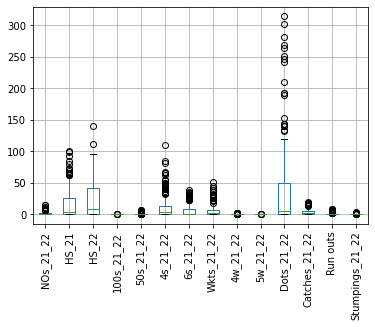

In [58]:
#Quick plot of those cols as boxplots
IPLPriceNPerf21_22.boxplot(column=['NOs_21_22',
       'HS_21', 'HS_22',
       '100s_21_22', '50s_21_22', '4s_21_22', '6s_21_22',
       'Wkts_21_22',
       '4w_21_22', '5w_21_22', 'Dots_21_22',
       'Catches_21_22', 'Run outs', 'Stumpings_21_22'], rot=90, return_type='axes');

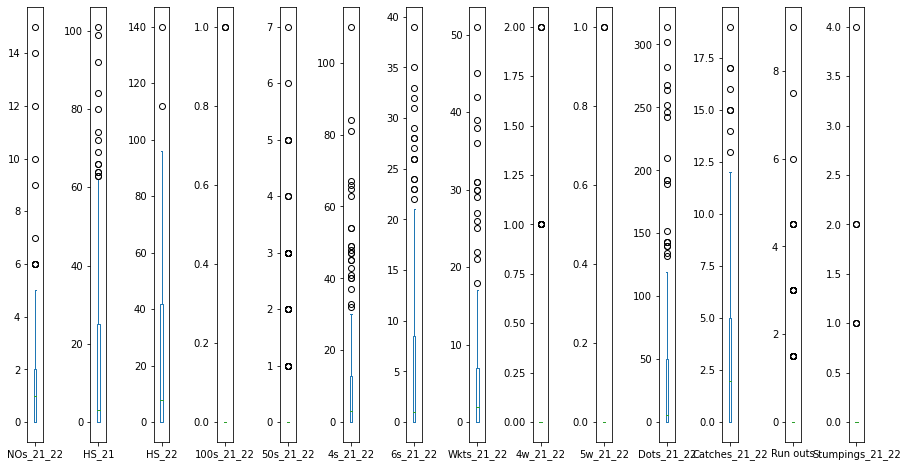

In [67]:
#Get a closer look at the boxplots
Discrete_cols.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 8)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=3.0) 
plt.show()

In [72]:
#Have a look at the 100s column in more detail - only 3 people have scored a century in a game, so that really marks them out.
Discrete_cols['100s_21_22'].value_counts().sort_values()

1.0      3
0.0    167
Name: 100s_21_22, dtype: int64

MinMaxScaler would work well for some of these discrete datas, with exception of wickets and dots (given their significance/importance) which should join the Standardised Scaled data.



In [74]:
#Standardise Wickets and dots cols
col_names2 = ['Wkts_21_22', 'Dots_21_22']
features2 = IPLPriceNPerf21_22_scaled[col_names2]
scaler2 = StandardScaler()
scaler2.fit(features2.values)
features2 = scaler2.transform(features2.values)

IPLPriceNPerf21_22_scaled[col_names2] = features2

IPLPriceNPerf21_22_scaled.head().T

,0,1,2,3,4
Player,Deepak Chahar,Ambati Rayudu,Dwayne Bravo,Shivam Dube,Chris Jordan
Country,India,India,West Indies,India,England
Team,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
Auc_Base_price_pounds,1396080.0,673110.0,438768.0,398880.0,358992.0
NOs_21_22,2.0,4.0,6.0,2.0,1.0
Run_21_22,-0.659819,1.93567,-0.321915,1.876904,-0.454139
HS_21,1.0,72.0,23.0,64.0,30.0
HS_22,0.0,78.0,12.0,95.0,6.0
Bat_Avg_21_22,-1.051062,1.044172,-0.345922,1.414774,-0.057945
BF_21_22,-0.68053,1.880226,-0.413377,1.775971,-0.498084


In [75]:
#MinMax scaling for other columsns
col_names3 = ['NOs_21_22',
       'HS_21', 'HS_22',
       '100s_21_22', '50s_21_22', '4s_21_22', '6s_21_22',
       '4w_21_22', '5w_21_22',
       'Catches_21_22', 'Run outs', 'Stumpings_21_22']
features3 = IPLPriceNPerf21_22_scaled[col_names3]
scaler3 = MinMaxScaler()
scaler3.fit(features3.values)
features3 = scaler3.transform(features3.values)

IPLPriceNPerf21_22_scaled[col_names3] = features3

IPLPriceNPerf21_22_scaled.head().T

,0,1,2,3,4
Player,Deepak Chahar,Ambati Rayudu,Dwayne Bravo,Shivam Dube,Chris Jordan
Country,India,India,West Indies,India,England
Team,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
Auc_Base_price_pounds,1396080.0,673110.0,438768.0,398880.0,358992.0
NOs_21_22,0.133333,0.266667,0.4,0.133333,0.066667
Run_21_22,-0.659819,1.93567,-0.321915,1.876904,-0.454139
HS_21,0.009901,0.712871,0.227723,0.633663,0.29703
HS_22,0.0,0.557143,0.085714,0.678571,0.042857
Bat_Avg_21_22,-1.051062,1.044172,-0.345922,1.414774,-0.057945
BF_21_22,-0.68053,1.880226,-0.413377,1.775971,-0.498084


##3.6 Split into training and test data

In [76]:
#Check length of data for 80/20 train/test split
len(IPLPriceNPerf21_22_scaled) * .8, len(IPLPriceNPerf21_22_scaled) * .2

(136.0, 34.0)

In [77]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(IPLPriceNPerf21_22_scaled.drop(columns='Auc_Base_price_pounds'), 
                                                    IPLPriceNPerf21_22_scaled.Auc_Base_price_pounds, test_size=0.2, 
                                                    random_state=47)

In [78]:
X_train.shape, X_test.shape

((136, 30), (34, 30))

In [79]:
y_train.shape, y_test.shape

((136,), (34,))

In [80]:
#Save 'Player', 'Country', 'Team' columns from the train/test data into names_train and names_test
#And drop those columns from `X_train` and `X_test`
names_list = ['Player', 'Country', 'Team']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((136, 27), (34, 27))

In [81]:
#Check that data types numeric
X_train.dtypes

NOs_21_22             float64
Run_21_22             float64
HS_21                 float64
HS_22                 float64
Bat_Avg_21_22         float64
BF_21_22              float64
BatSR_21_22           float64
100s_21_22            float64
50s_21_22             float64
4s_21_22              float64
6s_21_22              float64
Ov_21_22              float64
BowlRunsConc_21_22    float64
Wkts_21_22            float64
Bowl_Avg_21_22        float64
Econ_21_22            float64
BowlSR_21_22          float64
4w_21_22              float64
5w_21_22              float64
Dots_21_22            float64
Catches_21_22         float64
Run outs              float64
Stumpings_21_22       float64
T_All-Rounder           uint8
T_Batsman               uint8
T_Bowler                uint8
T_Wicket-Keeper         uint8
dtype: object

So, it looks like we're all set for the next stage - just need to save the data

In [83]:
#Save datasets 
IPLPriceNPerf21_22.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\processed_data\IPLPriceNPerf21_22_afterpreprocessing_data.csv')
IPLPriceNPerf21_22_scaled.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\processed_data\IPLPriceNPerf21_22_scaled_afterpreprocessing_data.csv')
X_train.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\processed_data\X_train_data.csv')
X_test.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\processed_data\X_test_data.csv')
y_train.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\processed_data\y_train_data.csv')
y_test.to_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\processed_data\y_test_data.csv')
